#### Table of content
- <a href="scatter_plot">Scatter plot</a>
- <a href="bubble_plot">Bubble plot</a>
- <a href="twoD_density_plot">2D density plot</a>
- <a href="heatmap_for_correllation">Heatmap for correllation</a>
- <a href="line_plot">Line plot</a>
- <a href="averaging_trends">Averaging trends</a>
- <a href="area_plot">Area plot</a>
- <a href="linear_regression">Linear regression</a>
- <a href="deleting_trends">Deleting trends</a>
- <a href="towD_line_plot">2D line plot and time series</a>
- <a href="pca">PCA - Principal Components analysis (dimensions reduction)</a>

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### Data

Source <a href='https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset'>here</a>.

In [73]:
data = pd.read_csv("data/london_bikes.csv")
data.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


<h1 id="scatter_plot">Scatter plot</h1>

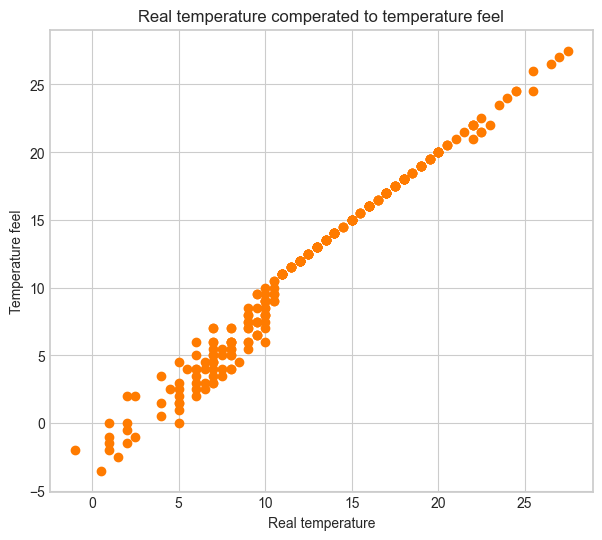

In [51]:
subset = data.sample(300)
plt.figure(figsize=(7, 6))
plt.scatter(subset.t1, subset.t2, color='#ff7b00')
plt.title("Real temperature comperated to temperature feel")
plt.xlabel("Real temperature")
plt.ylabel("Temperature feel")
plt.show()

<h1 id="bubble_plot">Bubble plot</h1>

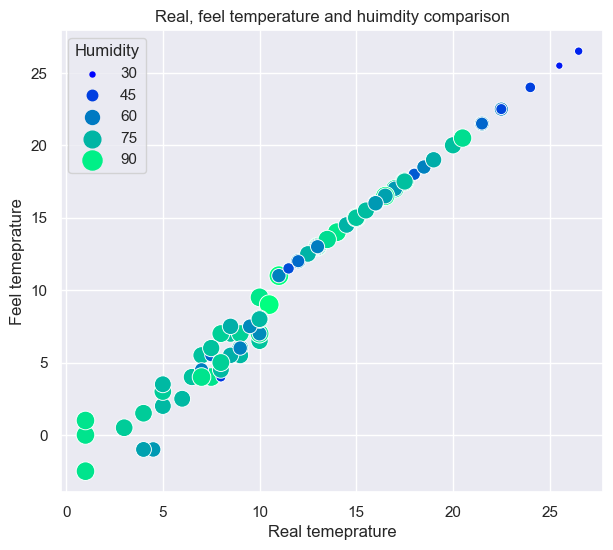

In [157]:
subset = data.sample(100)
subset.rename(columns={
    't1':'Real temeprature',
    't2':'Feel temeprature',
    'hum':'Humidity'
}, inplace=True)
plt.figure(figsize=(7, 6))
sns.scatterplot(
    subset,
    x='Real temeprature', y='Feel temeprature',
    hue='Humidity', size='Humidity', sizes=(10, 200),
    palette='winter'
)
plt.title("Real, feel temperature and huimdity comparison")
plt.show()

<h1 id="twoD_density_plot">2D density plot</h1>

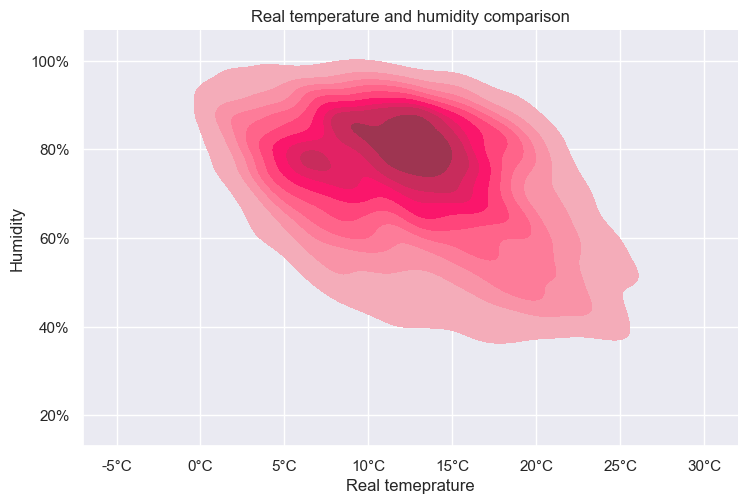

In [156]:
sns.set(rc = {'figure.figsize': (10, 7.5)})
sns.displot(data=data, x='t1', y='hum', kind='kde', height=5, aspect=1.5, color='pink', fill=True)
plt.yticks(np.arange(20, 101, 20), [f"{hum}%" for hum in np.arange(20, 101, 20)])
plt.xticks(np.arange(-5, 31, 5), [f"{temp}°C" for temp in np.arange(-5, 31, 5)])
plt.xlim(-7, 32)
plt.ylim(13, 107)
plt.title("Real temperature and humidity comparison")
plt.xlabel("Real temeprature")
plt.ylabel("Humidity")
plt.show()

<h1 id="heatmap_for_correllation">Heatmap for correllation</h1>

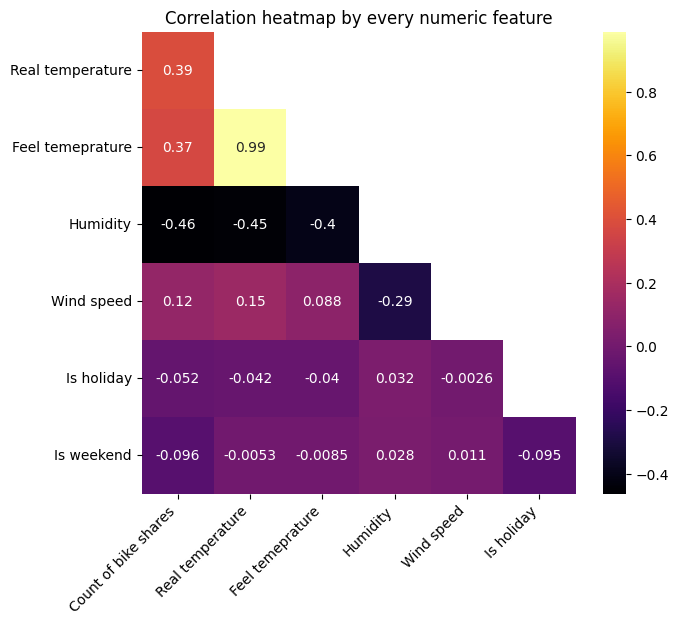

In [54]:
plt.style.use('default')
corr = data.drop(['weather_code', 'season'], axis=1).select_dtypes(include=np.number).corr()
corr.drop(['cnt'], axis=0, inplace=True)
corr.drop(['is_weekend'], axis=1, inplace=True)
change = {
    't1':'Real temperature', 't2':'Feel temeprature', 'hum':'Humidity',
    'wind_speed':'Wind speed', 'is_holiday':'Is holiday',
    'is_weekend':'Is weekend', 'cnt':'Count of bike shares'
}
corr.rename(index=change, columns=change, inplace=True)

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr, annot=True, cmap='inferno',
    mask=np.triu(np.ones_like(corr))-np.identity(len(corr))
)
plt.title("Correlation heatmap by every numeric feature")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.show()

<h1 id="line_plot">Line plot</h1>

In [39]:
waetherData = data[['timestamp', 't1', 'hum']].copy()
waetherData.timestamp = pd.to_datetime(waetherData.timestamp)
date, temp, humiditi = [], [], []

def addToStorage(year, dayOfYear):
    day = waetherData[(waetherData.timestamp.dt.year == year) & (waetherData.timestamp.dt.dayofyear == dayOfYear)]
    if len(day) != 0:
        date.append(day.timestamp.iloc[0].date())
        temp.append(np.mean(day.t1))
        humiditi.append(np.mean(day.hum))

# 2015
for day in range(waetherData.loc[0, 'timestamp'].dayofyear, 365+1):
    addToStorage(2015, day)

# 2016
for day in range(1, 366+1):
    addToStorage(2016, day)

# 2017
for day in range(1, waetherData.timestamp.iloc[-1].dayofyear+1):
    addToStorage(2017, day)

waetherData = pd.DataFrame({'Date':date, 'Temp':temp, 'Humidity':humiditi})

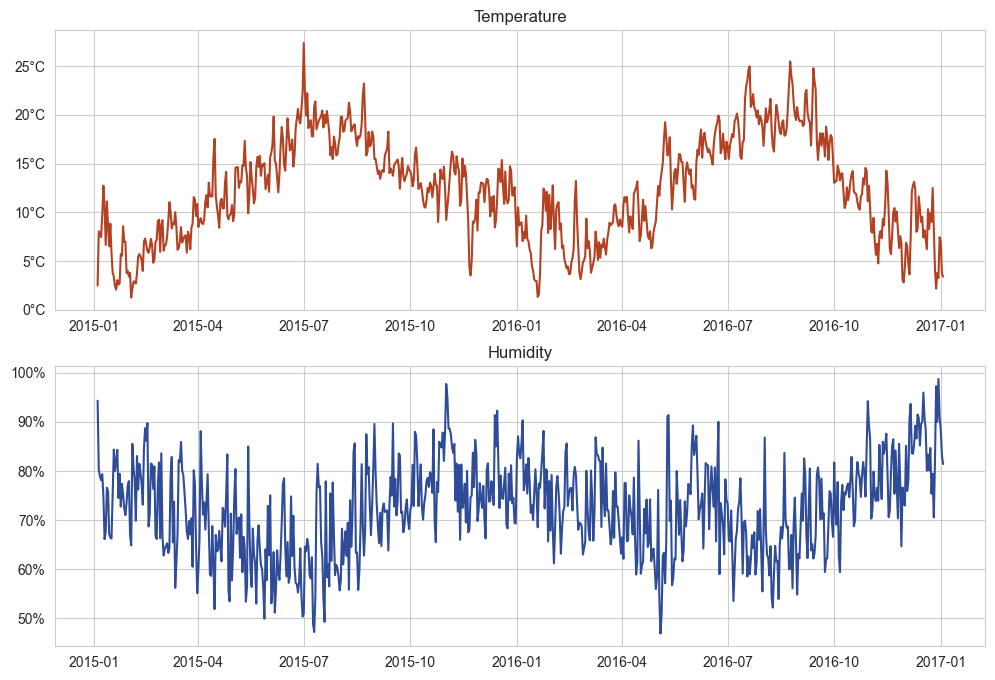

In [68]:
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot_date(waetherData.Date, waetherData.Temp, linestyle='solid', marker='', color='#b34122')
ax1.set_title("Temperature")
ax1.set_yticks(np.arange(0, 26, 5), [f"{temp}°C" for temp in np.arange(0, 26, 5)])

ax2.plot_date(waetherData.Date, waetherData.Humidity, linestyle='solid', marker='', color='#2f4c99')
ax2.set_title("Humidity")
ax2.set_yticks(np.arange(50, 101, 10), [f"{hum}%" for hum in np.arange(50, 101, 10)])

plt.show()

<h1 id="averaging_trends">Averaging trends</h1>

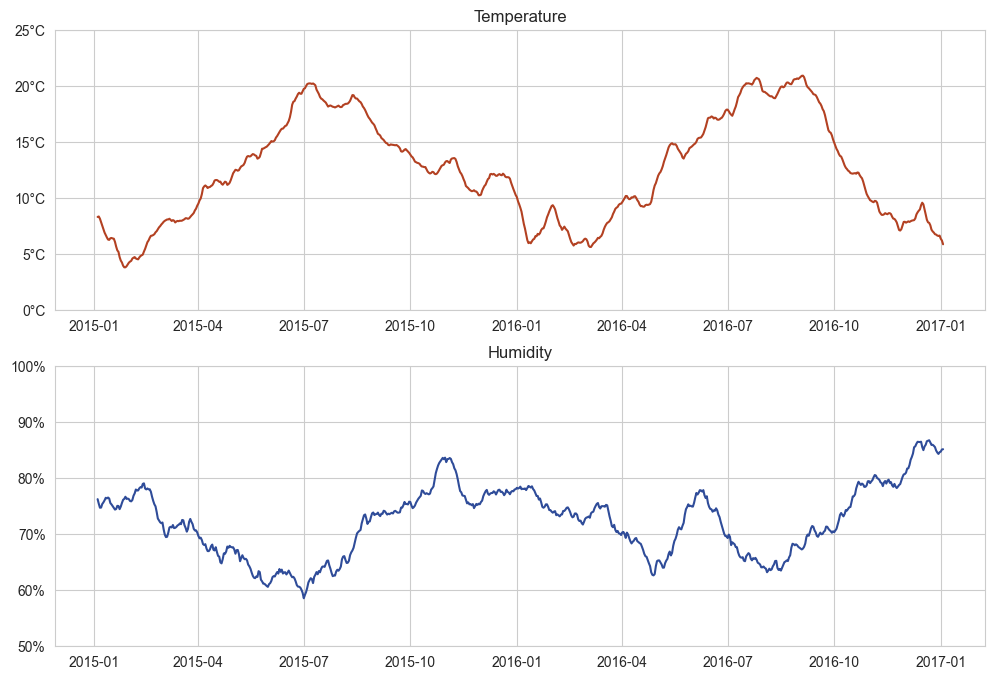

In [69]:
# averaging data
averagedWeatherData = waetherData.copy()
n = len(waetherData)
sigma = 10
for i in range(n):
    averagedWeatherData.loc[i, 'Temp'] = np.mean(waetherData.loc[max(0, i-sigma):min(n-1, i+sigma), 'Temp'])
    averagedWeatherData.loc[i, 'Humidity'] = np.mean(waetherData.loc[max(0, i-sigma):min(n-1, i+sigma), 'Humidity'])

# same code as above
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))
ax1.plot_date(averagedWeatherData.Date, averagedWeatherData.Temp, linestyle='solid', marker='', color='#b34122')
ax1.set_title("Temperature")
ax1.set_yticks(np.arange(0, 26, 5), [f"{temp}°C" for temp in np.arange(0, 26, 5)])
ax2.plot_date(averagedWeatherData.Date, averagedWeatherData.Humidity, linestyle='solid', marker='', color='#2f4c99')
ax2.set_title("Humidity")
ax2.set_yticks(np.arange(50, 101, 10), [f"{hum}%" for hum in np.arange(50, 101, 10)])
plt.show()

<h1 id="area_plot">Area plot</h1>

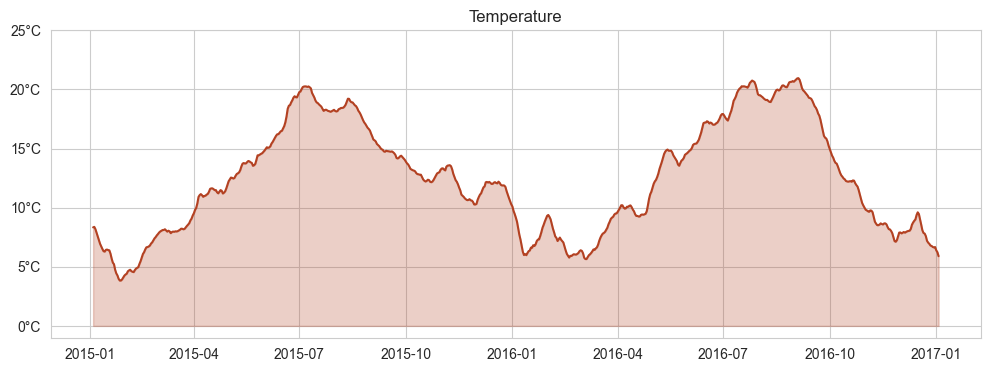

In [71]:
plt.figure(figsize=(12, 4))
plt.plot_date(averagedWeatherData.Date, averagedWeatherData.Temp, linestyle='solid', marker='', color='#b34122')
plt.fill_between(averagedWeatherData.Date, averagedWeatherData.Temp, color='#b34122', alpha=0.25)
plt.title("Temperature")
plt.yticks(np.arange(0, 26, 5), [f"{temp}°C" for temp in np.arange(0, 26, 5)])
plt.show()

<h1 id="linear_regression">Linear regression</h1>

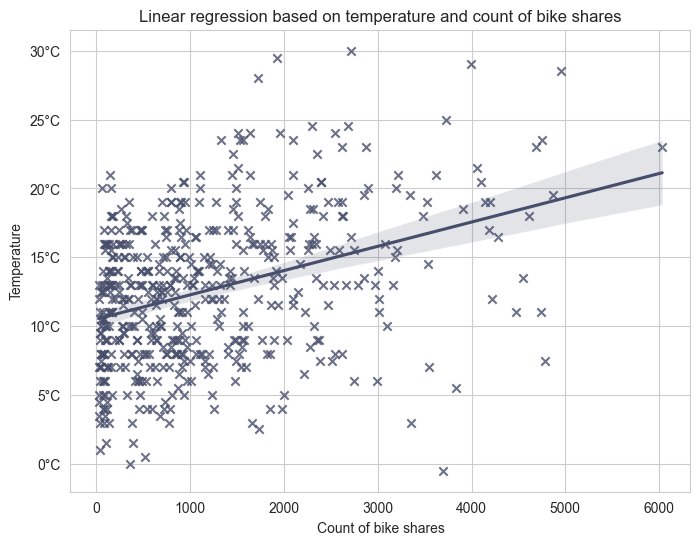

In [89]:
plt.figure(figsize=(8, 6))
sns.regplot(data.sample(500), x='cnt', y='t1', color='#474e6b', marker='x')
plt.title('Linear regression based on temperature and count of bike shares')
plt.xlabel('Count of bike shares')
plt.ylabel('Temperature')
plt.yticks(np.arange(0, 31, 5), [f"{temp}°C" for temp in np.arange(0, 31, 5)])
plt.show()

<h1 id="deleting_trends">Deleting trends</h1>

In [114]:
from sklearn.linear_model import LinearRegression

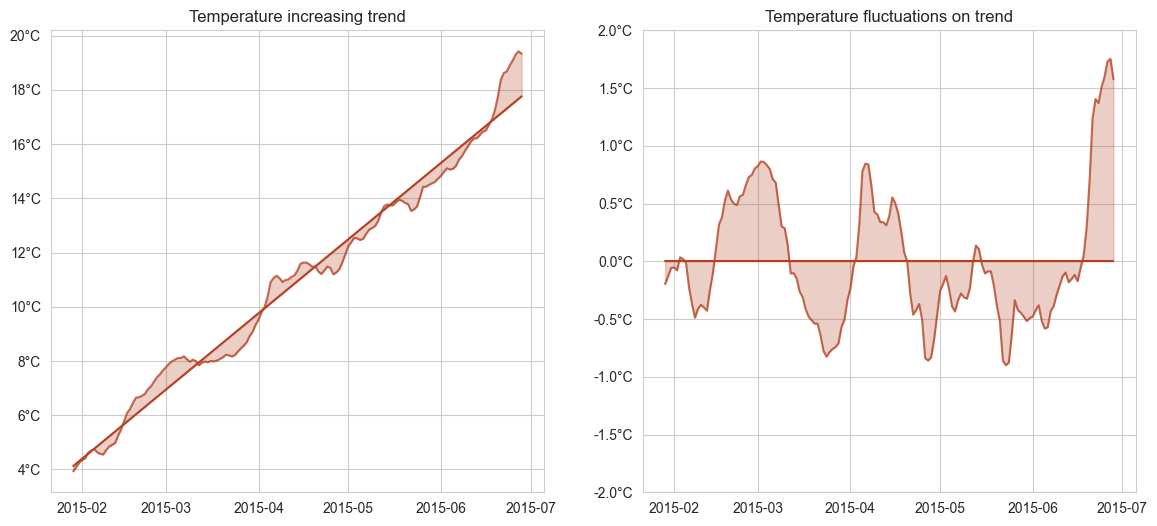

In [126]:
delData = averagedWeatherData.loc[25:175]

linReg = LinearRegression()
linReg.fit(np.arange(25, 176).reshape((151, 1)), delData.Temp)
pred = linReg.predict(np.arange(25, 176).reshape((151, 1)))

noTrend = delData.Temp - pred

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

ax1.plot_date(delData.Date, delData.Temp, linestyle='solid', marker='', color='#b34122', alpha=0.75)
ax1.plot(delData.Date, pred, color='#b34122')
ax1.fill_between(delData.Date, delData.Temp, pred, color='#b34122', alpha=0.25)
ax1.set_yticks(np.arange(4, 21, 2), [f"{temp}°C" for temp in np.arange(4, 21, 2)])
ax1.set_title('Temperature increasing trend')

ax2.plot_date(delData.Date, noTrend, linestyle='solid', marker='', color='#b34122', alpha=0.75)
ax2.plot(delData.Date, np.zeros(151), color='#b34122')
ax2.fill_between(delData.Date, noTrend, np.zeros(151), color='#b34122', alpha=0.25)
ax2.set_yticks(np.arange(-2, 2.1, 0.5), [f"{temp}°C" for temp in np.arange(-2, 2.1, 0.5)])
ax2.set_ylim(-2, 2)
ax2.set_title('Temperature fluctuations on trend')

plt.show()

<h1 id="towD_line_plot">2D line plot and time series</h1>

In [142]:
from matplotlib.collections import LineCollection

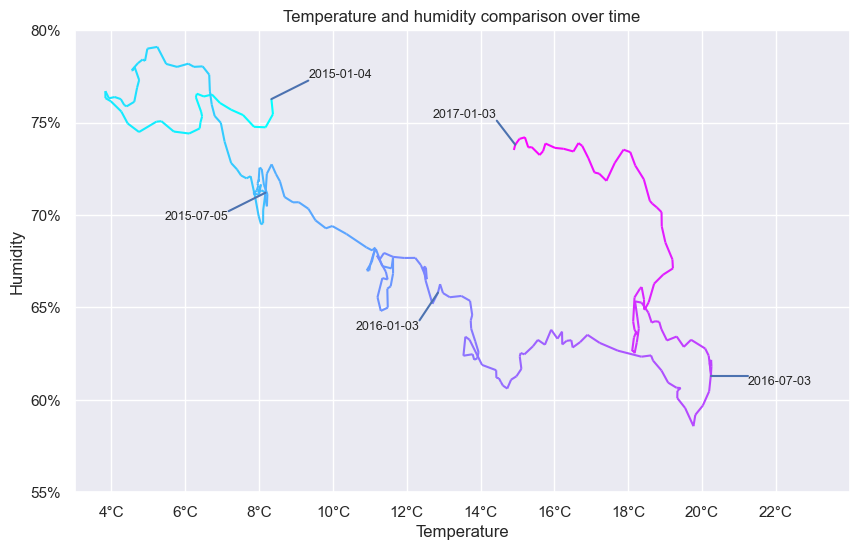

In [194]:
x = averagedWeatherData.loc[0:250, 'Temp'].to_numpy()
y = averagedWeatherData.loc[0:250, 'Humidity'].to_numpy()

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap=plt.get_cmap('cool'))
lc.set_array(np.linspace(0, 1, len(x)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.add_collection(lc)
ax.set_xlim(3, 24)
ax.set_ylim(55, 80)
ax.set_xticks(np.arange(4, 23, 2), [f"{temp}°C" for temp in np.arange(4, 23, 2)])
ax.set_yticks(np.arange(55, 81, 5), [f"{hum}%" for hum in np.arange(55, 81, 5)])
ax.set_title('Temperature and humidity comparison over time')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')

# writing information about date  on graph
startPoints = segments[np.linspace(0, len(segments)-1, 5).astype('int32')]
startPoints = [line[0] for line in startPoints]
shifts = [[1, 1], [-1, -1], [-0.5, -1.5], [1, 0], [-0.5, 1.3]]
dates = averagedWeatherData.loc[np.linspace(0, 729, 5).astype('uint32'), 'Date'].to_list()

for (spX, spY), (shiftX, shiftY), date in zip(startPoints, shifts, dates):
    ax.add_line(plt.Line2D([spX, spX+shiftX], [spY, spY+shiftY]))
    vAnchor = 'bottom' if shiftY > 0 else 'top'
    hAnchor = 'left' if shiftX > 0 else 'right'
    ax.text(spX+shiftX, spY+shiftY, date, fontsize=9, horizontalalignment=hAnchor, verticalalignment=vAnchor)

plt.show()

<h1 id="pca">PCA - Principal Components analysis (dimensions reduction)</h1>

Sources:<br/>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://www.youtube.com/watch?v=FgakZw6K1QQ">StatQuest: Principal Component Analysis (PCA), Step-by-Step</a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://www.youtube.com/watch?v=Lsue2gEM9D0">StatQuest: PCA in Python</a>

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [97]:
subset = data.select_dtypes(include=np.number)
seasonConverter = {0:'Spring', 1:'Summer', 2:'Fall', 3:'Winter'}
subset.season = subset.season.transform(lambda x: seasonConverter[x])
weatherConverter = {1:'Clear', 2:'Few clouds', 3:'Broken clouds', 4:'Cloudy', 7:'Rain', 10:'Thunderstorm', 26:'Snowfall'}
subset.weather_code = subset.weather_code.transform(lambda x: weatherConverter[x])
subset = pd.concat([subset, pd.get_dummies(subset.weather_code)], axis=1)
subset.drop(['weather_code'], axis=1, inplace=True)

for feature in ['cnt', 't1', 't2', 'hum', 'wind_speed']:
    subset[feature] = StandardScaler().fit_transform(subset[feature].values.reshape(-1, 1))

X = subset.drop(['season'], axis=1)

pca = PCA(n_components=2)
pca.fit(X)
principalComponents = pca.transform(X)
principalComponents = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
explainedVarianceRation = pca.explained_variance_ratio_

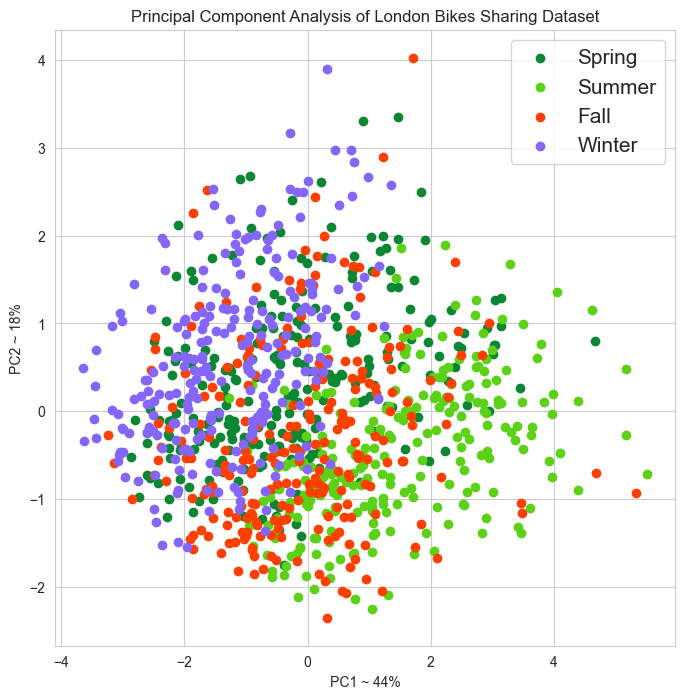

In [117]:
plt.figure(figsize=(8, 8))

targets = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['#0b8734', '#5bd117', '#ff4000', '#8466fa']
for target, color in zip(targets, colors):
    mask = subset['season'] == target
    points = principalComponents.loc[mask].sample(250)
    plt.scatter(points['PC1'], points['PC2'], color=color)

plt.legend(targets, prop={'size': 15})

plt.title("Principal Component Analysis of London Bikes Sharing Dataset")
plt.xlabel(f'PC1 ~ {round(explainedVarianceRation[0]*100)}%')
plt.ylabel(f'PC2 ~ {round(explainedVarianceRation[1]*100)}%')

plt.show()